# 🚀 **Aula 02: Parte 02 - Coletando e trabalhando com dados**

## Nesta aula iremos estar aprendendo como coletar dados de alguns websites e como trabalhar com esses dados, e para isso, estaremos utilizando a biblioteca **Beautiful Soup** para realizar a **raspagem de dados**, a biblioteca **requests** para realizar as requisições e por último, utilizaremos a biblioteca **pandas** para trabalhar com os dados.

---

# **1. A Biblioteca requests** ⚡

## A primeira coisa que precisamos fazer para realizar o web scrap é baixar a página. Podemos baixar as páginas utilizando a biblioteca requests do Python. <br>
## A biblioteca requests fará uma solicitação GET ao servidor, que fará o download dos conteúdos HTML da página solicitada para nós. <br> 
## Existem vários tipos de solicitação diferentes que podemos realizar utilizando a biblioteca requests – GET é apenas um deles.

# **2. A Biblioteca BeautifulSoup** ⚡

<img src="images/beautifulSoup.jpg" alt="Drawing" style="width: 600px;"/>

## Depois de realizarmos uma requisicao bem sucedida da página que desejamos usando o requests, podemos utilizar a biblioteca BeautifulSoup para analisar o html da página e extrair o conteúdo das tags que desejamos.

# **3. A biblioteca Pandas** ⚡

<img src="images/pandas.png" alt="Drawing" style="width: 400px;"/>

## **pandas** é uma biblioteca de software criada para a linguagem Python para manipulação e análise de dados. <br>
## Iremos utilizar-lá para manipular os dados coletados durante a raspagem de dados.

# **4. Instalando bibliotecas** ⚡

## Antes de importar as bibliotecas precisamos realizar a instalacao das mesmas. <br>
## Para isso, iremos utilizar o gerenciador de pacotes do Python ***pip***

In [ ]:
!pip install beautifulsoup4
!pip install requests
!pip install pandas
!pip install seaborn
!pip install wordcloud

## **4.1 Importando pacotes**

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# **5 Criando nosso primeiro programa** ⚡

## 5.1 Coletando dados do portal de notícias da Unipinhal

### Antes de comecar a coleta, vamos verificar o site para coletar algumas informacoes

In [ ]:
def scrapping_unipinhal():
    url = 'https://www.sou.unipinhal.edu.br/noticias'
    website = requests.get(url)
    if website.status_code != 200:
        return None
    # conteudo da requisicao
    conteudo_website = website.content
    # analise do resultado obtido
    website_analisado = BeautifulSoup(conteudo_website, 'html.parser')
    # Div contendo todos valores desejados
    informacoes = website_analisado.find_all("div", attrs= {"class":"_3tJ3x _1e-gz post-list-item-wrapper blog-post-homepage-description-font blog-post-homepage-description-color blog-post-homepage-description-fill _3RzkT"})
    # criacao de lisdta vazia para ser preenchida com o tempo
    informacoes_completas = []
    for informacao in informacoes:
        titulo = informacao.select('h2 div')[0]
        descricao = informacao.find('div', attrs = {"class": "_81XUh"})
        data = informacao.select('li span')[0]
        informacoes_completas.append([titulo.text, descricao.text, data.text])
    return informacoes_completas

In [ ]:
lista_de_informacoes = scrapping_unipinhal()

In [ ]:
df = pd.DataFrame(lista_de_informacoes, columns = ['Titulo', 'Descricao', 'Data'])
df

In [ ]:
df.to_excel('NoticiasUnipinhal.xlsx', index = False)

# **6. Coletando e trabalhando com dados do website imbd.com** ⚡

## **6.1 Buscando filmes: Coletando dados de 200 filmes pelo genero escolhido**

##

In [ ]:
def busca_filmes(genero):
    # url dos filmes a serem buscados
    url = f'https://www.imdb.com/find?s=tt&q={genero}&ref_=nv_sr_sm'
    website = requests.get(url)
    # condicao: se o codigo for diferente de 200 faca com que a funcao nao retorne nada (parar a funcao)
    if website.status_code != 200:
        return None
    #seguimento padrao (coletando conteudo do website)
    cont_web = website.content
    #seguimento padrao (analisando o conteudo do website)
    website_analisado = BeautifulSoup(cont_web, 'html.parser')
    #titulo, link do filme
    informacoes = website_analisado.findAll("td", attrs = {"class": "result_text"})
    informacoes_filmes = []
    for informacao in informacoes:
        #coletando o a da div (a div possui apenas uma tag a, logo, buscando por ela nesse ionetrvalo conseguimos extrair o texto dela.)
        titulo = informacao.find('a').text
        # coletando link
        link_filme = informacao.find('a')['href']
        #Como estamos fazendo o append com mais de um item, 'e necessario criar uma lista dentro do append, por isso os colchetes
        informacoes_filmes.append([titulo, link_filme])
        print(titulo, link_filme)

filme = input("Digite um genero de filme")
busca_filmes(filme)

## **6.2 Coletar ano de producao e score de todos os 200 filmes ja coletados**

### Para isso, vamos utilizar um filme exemplo para coletar os dados

In [ ]:
link_exemplo = f"https://www.imdb.com/title/tt0130350/?ref_=fn_tt_tt_2"
request_exemplo = requests.get(link_exemplo)
analise = BeautifulSoup(request_exemplo.content, 'html.parser')

## **Coletando o ano**

In [ ]:
ano = analise.find("span", attrs = {"class": "TitleBlockMetaData__ListItemText-sc-12ein40-2 jedhex"})
print(ano.text)

### Funcao que retorna o ano de todos os filmes, de acordo com o parametro *analise_site*

In [ ]:
def get_ano(analise_site):
    ano =  analise_site.find("span", attrs = {"class": "TitleBlockMetaData__ListItemText-sc-12ein40-2 jedhex"})
    try:
        return (int(ano.text))
    except Exception:
        return None

## **Coletando score**

In [ ]:
score = analise.find("span", attrs = {"class": "AggregateRatingButton__RatingScore-sc-1ll29m0-1 iTLWoV"})
print(score.text)

### Funcao que retorna o score de todos os filmes, de acordo com o parametro *analise_site*

In [ ]:
def get_score(analise_site):
    score = analise_site.find("span", attrs = {"class": "AggregateRatingButton__RatingScore-sc-1ll29m0-1 iTLWoV"})
    if score is None:
        return None
    return float(score.text)

## **Coletando sinopses**

### Funcao que retorna a sinopse de todos os filmes, de acordo com o parametro *analise_site*

In [ ]:
def get_sinopse(analise_site):
    sinopse = analise_site.find("span", attrs = {"class": "GenresAndPlot__TextContainerBreakpointXS_TO_M-cum89p-0 dcFkRD"})
    if sinopse is None:
        return None
    read_all_string = "... Read all"
    if read_all_string not in sinopse.text:
        return sinopse.text
    return sinopse.text.replace(read_all_string, "")

## **Reunindo as funcoes:**

In [31]:
def get_ano(analise_site):
    ano =  analise_site.find("span", attrs = {"class": "TitleBlockMetaData__ListItemText-sc-12ein40-2 jedhex"})
    try:
        return (int(ano.text))
    except Exception:
        return None

def get_score(analise_site):
    score = analise_site.find("span", attrs = {"class": "AggregateRatingButton__RatingScore-sc-1ll29m0-1 iTLWoV"})
    if score is None:
        return None
    return float(score.text)

def get_sinopse(analise_site):
    sinopse = analise_site.find("span", attrs = {"class": "GenresAndPlot__TextContainerBreakpointXS_TO_M-cum89p-0 dcFkRD"})
    if sinopse is None:
        return None
    read_all_string = "... Read all"
    if read_all_string not in sinopse.text:
        return sinopse.text
    return sinopse.text.replace(read_all_string, "")

def buscador_filmes(genero, numero_filmes):
    url = f'https://www.imdb.com/find?s=tt&q={genero}&ref_=nv_sr_sm'
    website = requests.get(url)
    if website.status_code != 200:
        return None
    cont_web = website.content
    website_analisado = BeautifulSoup(cont_web, 'html.parser')
    #titulo, link do filme
    informacoes_filmes = website_analisado.findAll("td", attrs = {"class": "result_text"})
    titulos_filmes = []
    links_completos = []

    # Primeiro for: Coletar titulos e links dos filmes
    for informacao_filme, i in zip(informacoes_filmes, range(numero_filmes)):
        titulo = informacao_filme.find('a').text
        link_padrao = "https://www.imdb.com"
        link_filme = informacao_filme.find('a')['href']
        link_completo = link_padrao + link_filme
        titulos_filmes.append(titulo)
        links_completos.append(link_completo)

    lista_filmes = []
    all_sinopse_list = []
    # Segundo for: com os links coletados fazer uma iteracao em cada um e coletar as informacoes das funcoes get_score(), get_ano() e get_sinopse())
    for titulo, link_completo in zip(titulos_filmes, links_completos):
        dic = {'titulo': titulo, 'link': link_completo}
        req = requests.get(link_completo)
        analise = BeautifulSoup(req.content, 'html.parser')
        req.close()

        dic['score'] = get_score(analise)
        dic['ano'] = get_ano(analise)
        dic['sinopse'] = get_sinopse(analise)
        all_sinopse_list.append(dic['sinopse'])
        lista_filmes.append(dic)
    return (lista_filmes, all_sinopse_list)

## **Funcao para criar wordcloud com sinopses**

In [28]:
def sinopses_word_cloud(sinopses_list, genero_filme):
    stopwords = set(STOPWORDS)
    palavras_nao_utilizadas = ["da", "meu", "em", "você", "de", "ao", "os", "None", "que", "é", "ha"] 
    stopwords.update(palavras_nao_utilizadas)
    all_sinopse_joined = " ".join(sinopses_list)
    wordcloud = WordCloud(stopwords=stopwords,
                        background_color="black",
                        width=1600, height=800).generate(all_sinopse_joined)
    
    fig, ax = plt.subplots(figsize=(10,6))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_axis_off()
    
    plt.imshow(wordcloud);
    wordcloud.to_file(f"Sinopses_word_cloud - genero: {genero_filme}.png")

## **Realizando chamada das funcoes**

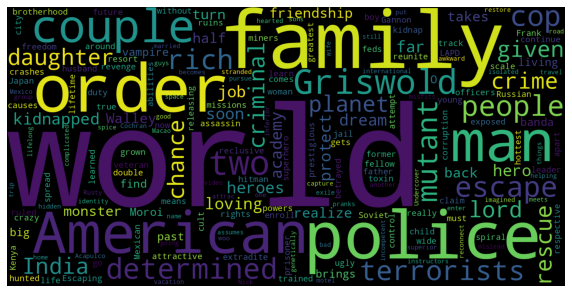

In [34]:
genero_filme = input("Digite um genero de filme ")
qtt_filmes = int(input("Quantos filmes voce deseja coletar? "))
filmes_coletados = buscador_filmes(genero_filme, qtt_filmes)
lista_filmes = filmes_coletados[0]
lista_de_sinopses = filmes_coletados[1]
sinopses_word_cloud(lista_de_sinopses, genero_filme)